# Skaters (Season 2024/25) - Goals per 60

### Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from utils import data_cleaning
from utils import distribution_analysis as da
from utils import distribution_models
from utils import correlation_analysis
from utils import hypothesis_testing
from utils import regression_analysis

### Import the dataset

In [4]:
#skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
skaters_df = "../data/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


### Read the data

In [5]:
data_cleaning.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [6]:
data_cleaning.save_column_names(df)

Saved: names_columns.txt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


### Data cleaning

In [8]:
# Missing values?
data_cleaning.report_nan(df)

No missing values found.


In [9]:
df = data_cleaning.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = data_cleaning.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


## Part 01 - Goals per 60

### Variables and Filter

In [10]:
situation = "all"
feature1 = "I_F_goals"
feature2 = "icetime"
feature = "goals_per_60"
min_games_played = 20
name_player="Auston Matthews"

A new feature with the goals per 60.

In [11]:
df_goals = df.copy()
df_goals[feature] = (df_goals[feature1] / df_goals[feature2]) * 3600

In [12]:
df_goals = df_goals[(df["situation"]==situation) & (df_goals["games_played"]>=min_games_played)]

### Summary Statistics

In [13]:
res = df_goals.loc[lambda d: d[feature].idxmax()]
print(f"Player with the highest rate: {res["name"]} with {res[feature]:.2f}.")

res = df_goals.loc[lambda d: d[feature].idxmin()]
print(f"Player with the lowest rate: {res["name"]} with {res[feature]:.2f}.")

print(f"Mean: {df_goals[feature].mean():.2f}")
print(f"Variance: {df_goals[feature].var():.2f}")
print(f"Standard deviation: {df_goals[feature].std():.2f}")

Player with the highest rate: Alex Ovechkin with 2.29.
Player with the lowest rate: Adam Pelech with 0.00.
Mean: 0.59
Variance: 0.18
Standard deviation: 0.42


### Cumulative Distribution Function

Auston Matthews - Percentile rank: 96.99
Median: 0.53
Interquartile range: 0.66
Quartile skewness: 0.07


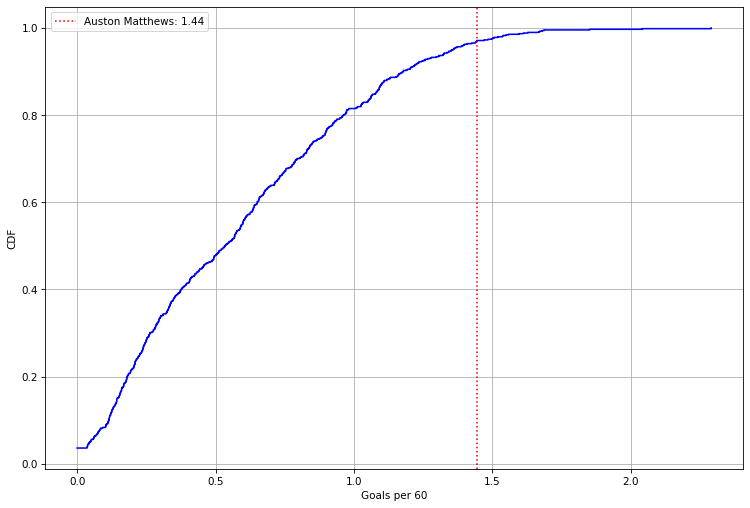

In [14]:
vals = df_goals[feature].values
ref = df_goals[df_goals["name"]==name_player][feature].values[0]

da.print_percentile_rank(ref, vals, label=name_player)
da.plot_cdf(ref, vals, label=name_player, xlabel="Goals per 60")

### Probability Density Function and Kernel Density Estimate

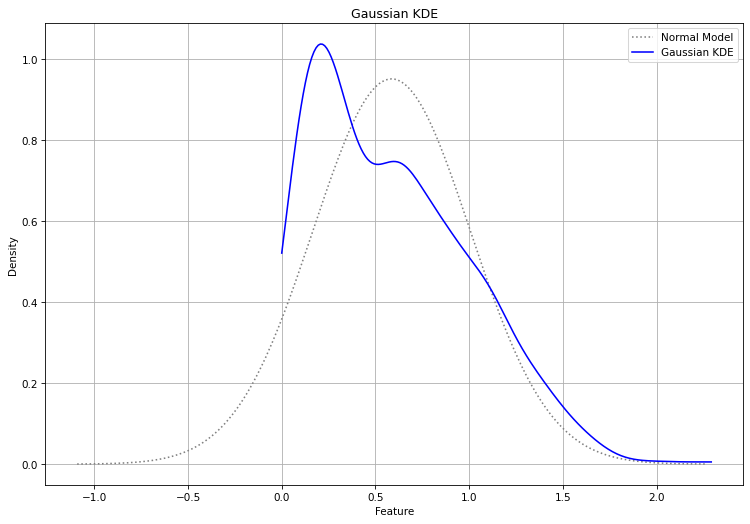

In [16]:
da.plot_gaussian_kde(df_goals[feature])

### Modeling Distribution

In [24]:
from utils import distribution_analysis as da
import importlib
importlib.reload(da)

<module 'utils.distribution_analysis' from '/Users/daniel_daduyo/Desktop/projects/moneypuck-data/utils/distribution_analysis.py'>

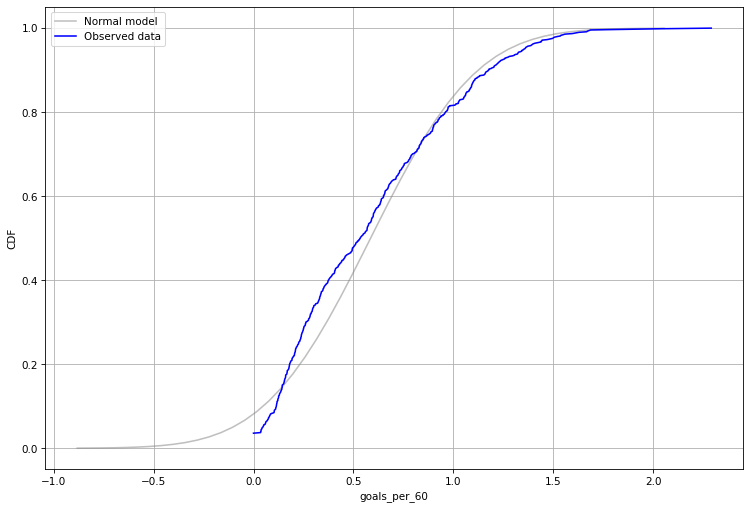

In [23]:
da.plot_cdf_with_normal(df_goals[feature])

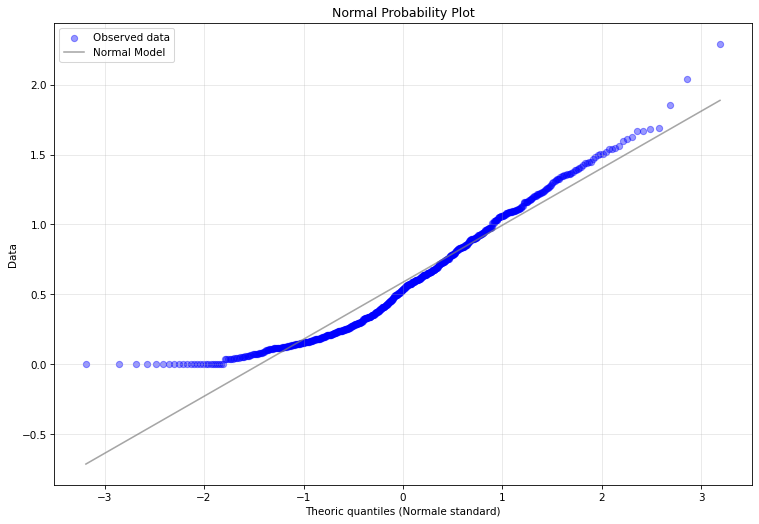

In [25]:
da.normal_probability_plot(df_goals[feature])